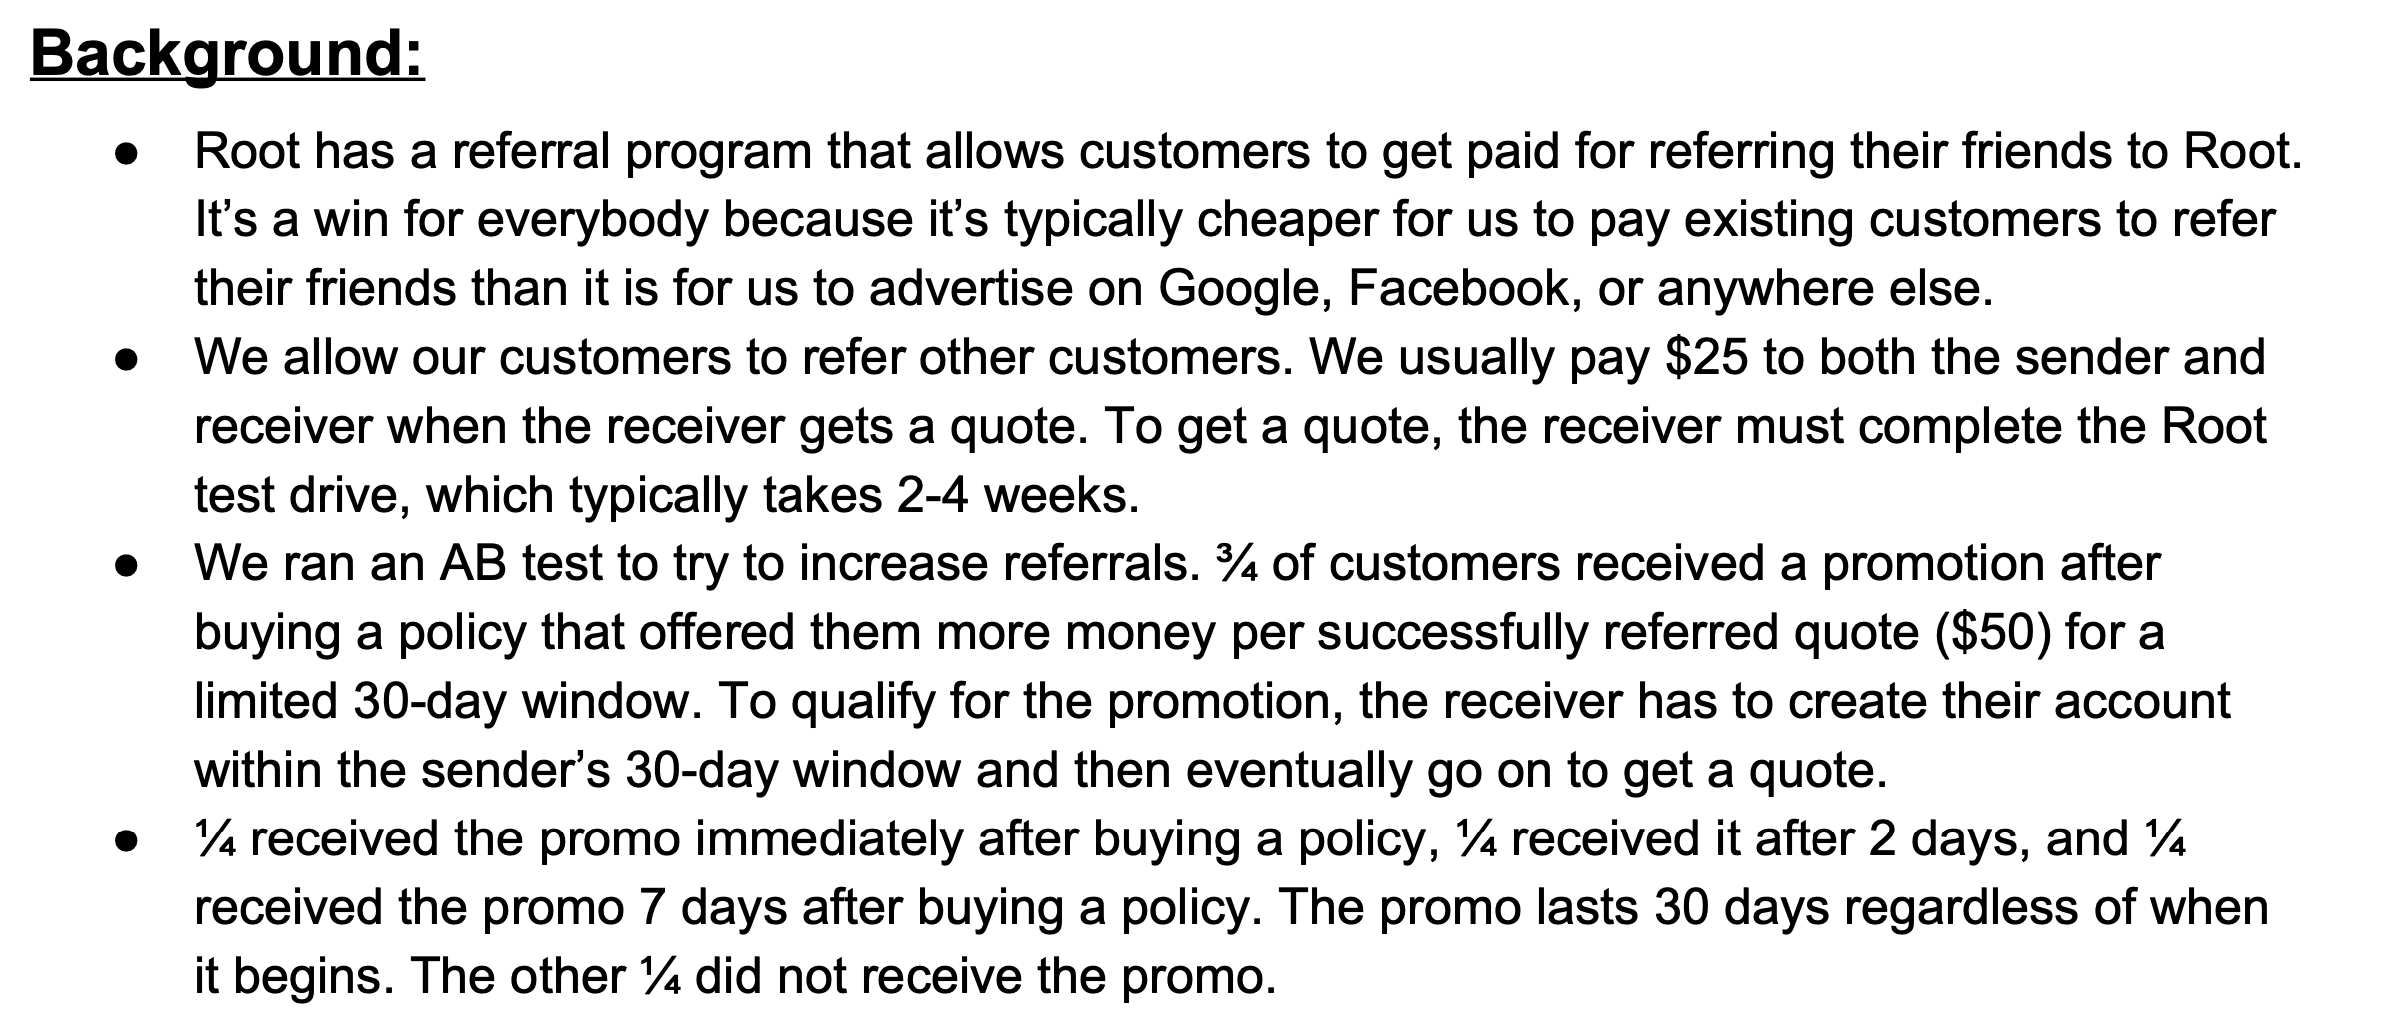

In [51]:
import pandas as pd
import numpy as np

In [2]:
referral_promo_participants=pd.read_csv('/Users/nischal/Downloads/Root Exercise/referral_promo_participants.csv')

In [3]:
referral_promo_participants.head()

,user_id,bucket,bucket_timestamp
0,12d8e2ba-e59b-4dec-950b-11de5f9ee87e,0hr,2018-03-15 13:50:40.087
1,3e38147a-dab0-4c80-a99b-2a499238a782,168hr,2018-05-05 14:05:15.997
2,c64c3928-3f99-49ac-bea0-5d6bc11014ec,0hr,2018-04-05 19:45:42.933
3,ba3d0b9d-c89f-4c88-a05e-0db56c2aebfe,off,2018-02-22 16:48:54.827
4,7a83b4f0-a089-4362-a5fe-e4efa2b5fb87,off,2018-04-26 17:32:35.584


In [5]:
referral_promo_participants['bucket'].unique()

array(['0hr', '168hr', 'off', '48hr'], dtype=object)

In [9]:
conditions = [
    referral_promo_participants['bucket']=='0hr',
    referral_promo_participants['bucket']=='168hr',
    referral_promo_participants['bucket']=='48hr',
    referral_promo_participants['bucket']=='off'
    
]

In [10]:
outputs = [
    'immediately', '7 days after', '2 days after', 'no promo'
]

In [12]:
referral_promo_participants['promo_start']=np.select(conditions,outputs)

In [14]:
referral_promo_participants['promo_start'].unique()

array(['immediately', '7 days after', 'no promo', '2 days after'],
      dtype=object)

In [15]:
referral_promo_participants.head()

,user_id,bucket,bucket_timestamp,promo_start
0,12d8e2ba-e59b-4dec-950b-11de5f9ee87e,0hr,2018-03-15 13:50:40.087,immediately
1,3e38147a-dab0-4c80-a99b-2a499238a782,168hr,2018-05-05 14:05:15.997,7 days after
2,c64c3928-3f99-49ac-bea0-5d6bc11014ec,0hr,2018-04-05 19:45:42.933,immediately
3,ba3d0b9d-c89f-4c88-a05e-0db56c2aebfe,off,2018-02-22 16:48:54.827,no promo
4,7a83b4f0-a089-4362-a5fe-e4efa2b5fb87,off,2018-04-26 17:32:35.584,no promo


In [19]:
referral_promo_participants.shape

(3584, 4)

In [58]:
referral_promo_participants.groupby('bucket').count()['bucket_timestamp']

bucket
0hr      881
168hr    851
48hr     917
off      935
Name: bucket_timestamp, dtype: int64

#### Observations:

1) There is a total of 3,584 participants in the test group. 

2) Out of 3,584 that recieved promo, 881 that started immediately, 851 started after 7 days, 917 started after 2 days, and 935 did not recieve any promotion

In [16]:
promo_referrals=pd.read_csv('/Users/nischal/Downloads/Root Exercise/promo_referrals.csv')

In [17]:
promo_referrals.head()

,sender_user_id,receiver_account,receiver_account_timestamp,receiver_quote,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars
0,8c37f11b-b892-48a5-96d1-650cbc5b9bb1,1,2018-04-05 13:35:50.275,0,NaN,0,NaN,NaN,NaN
1,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-03-20 20:59:17.678,1,2018-04-06 11:39:19.362,0,NaN,50.0,50.0
2,5c3a3470-53ea-4ff4-b166-b80816130bff,1,2018-03-13 00:00:19.428,1,2018-03-27 10:39:20.716,0,NaN,50.0,25.0
3,d88c9d5f-ee03-4bf7-9586-7cbf76285643,1,2018-04-28 17:51:25.921,0,NaN,0,NaN,NaN,NaN
4,877baf00-5269-4ab4-baa1-53f62cad3ee2,1,2018-01-31 17:16:10.907,0,NaN,0,NaN,NaN,NaN


In [61]:
promo_referrals[promo_referrals['receiver_quote']==1]['sender_earned_amount_in_dollars'].unique()

array([50., 25., nan])

In [88]:
promo_referrals[promo_referrals['receiver_quote']==1]['receiver_earned_amount_in_dollars'].unique()

array([50., 25., nan])

In [89]:
promo_referrals[promo_referrals['receiver_quote']==0]['receiver_earned_amount_in_dollars'].unique()

array([nan])

In [62]:
promo_referrals[promo_referrals['receiver_quote']==0]['sender_earned_amount_in_dollars'].unique()

array([nan])

In [20]:
promo_referrals.shape

(1202, 9)

#### Observations:

1) Out of 3584 participants, assuming that each participant in test group referred to only one other person, 1202 people participated in the referral program by creating a account and doing test drive which is 33.5% participant rate after referral

2) Only those who senders who referred and reciever that recieved the quote got the referral bonus


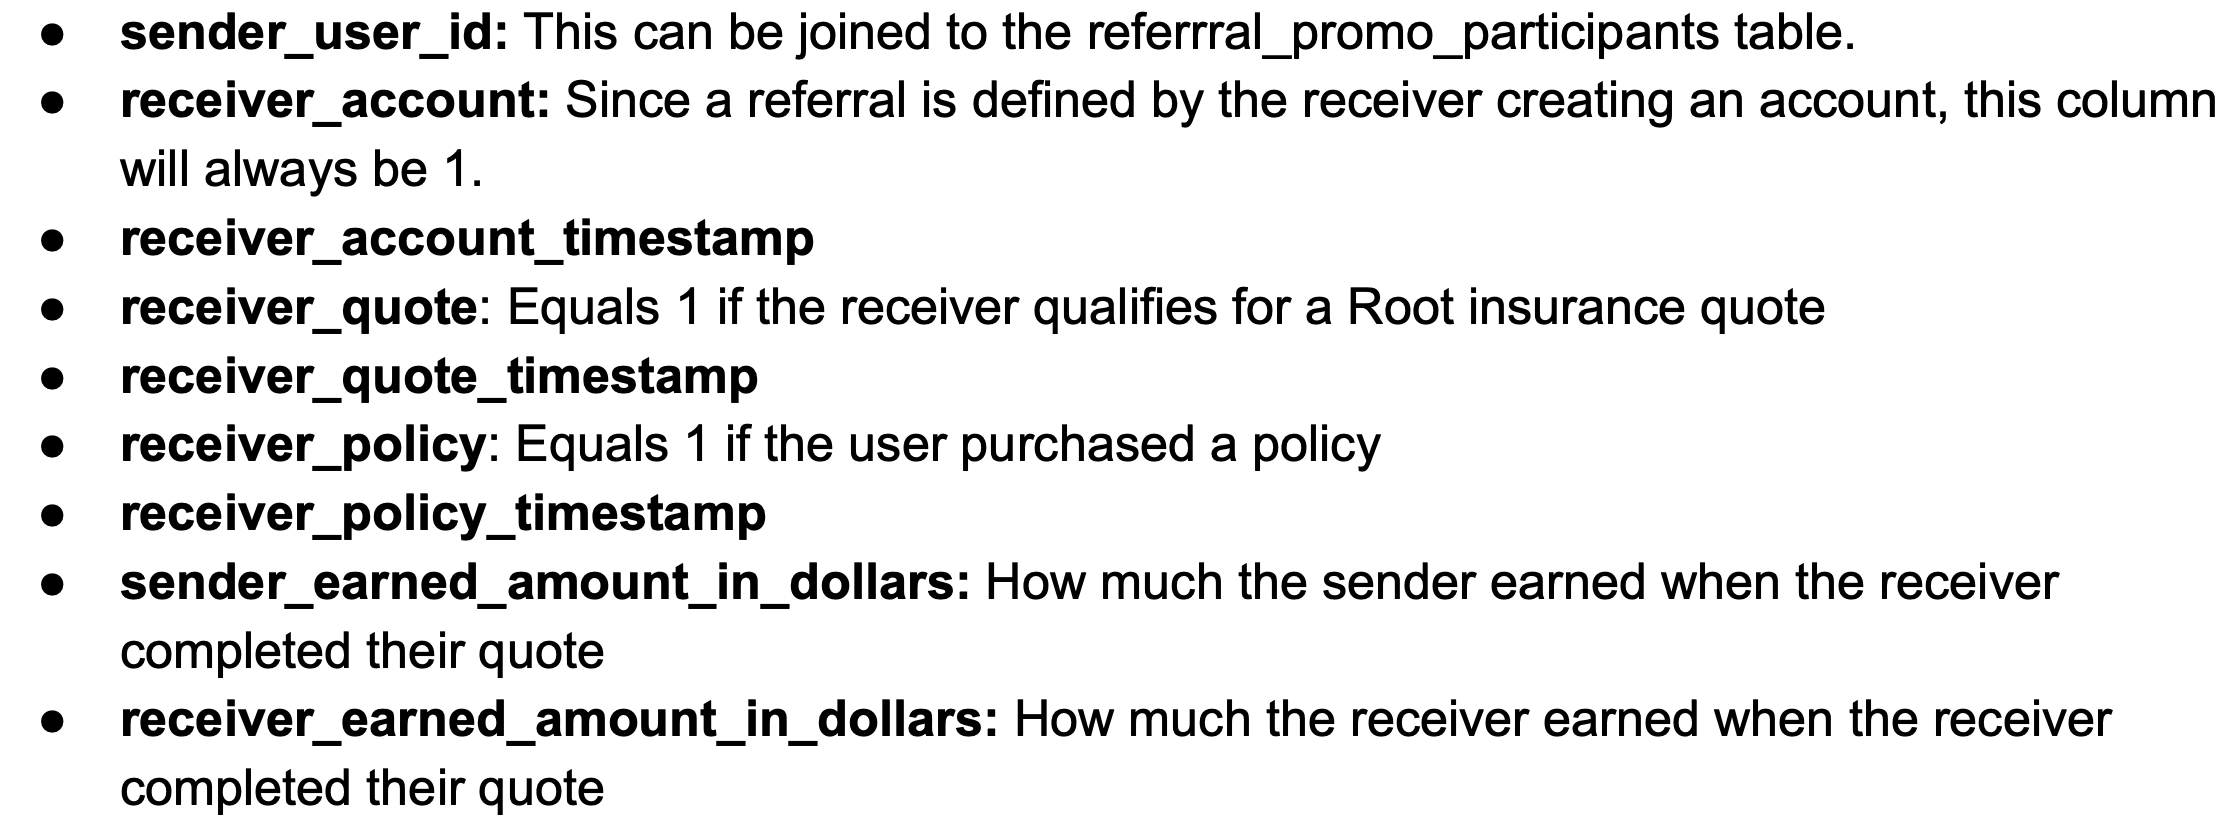

#### Merging the dataset 

In [22]:
merged_df=pd.merge(promo_referrals,referral_promo_participants,how='inner',left_on='sender_user_id',right_on='user_id')

In [66]:
merged_df.head()

,sender_user_id,receiver_account,receiver_account_timestamp,receiver_quote,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,user_id,bucket,bucket_timestamp,promo_start
0,8c37f11b-b892-48a5-96d1-650cbc5b9bb1,1,2018-04-05 13:35:50.275,0,NaN,0,NaN,NaN,NaN,8c37f11b-b892-48a5-96d1-650cbc5b9bb1,168hr,2018-04-19 21:53:31.565,7 days after
1,8c37f11b-b892-48a5-96d1-650cbc5b9bb1,1,2018-04-20 03:13:34.558,0,NaN,0,NaN,NaN,NaN,8c37f11b-b892-48a5-96d1-650cbc5b9bb1,168hr,2018-04-19 21:53:31.565,7 days after
2,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-03-20 20:59:17.678,1,2018-04-06 11:39:19.362,0,NaN,50.0,50.0,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,7 days after
3,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-03-12 22:42:53.051,1,2018-04-07 09:11:07.482,0,NaN,25.0,25.0,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,7 days after
4,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-04-01 20:59:46.835,1,2018-05-04 08:18:27.123,1,2018-05-05 03:46:45.911,50.0,50.0,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,7 days after


In [23]:
merged_df.shape

(1202, 13)

#### Out of the referred customers, the distribution of sender's bucket is as follows:

In [97]:
merged_df.groupby('promo_start').count()['sender_earned_amount_in_dollars']

promo_start
2 days after     95
7 days after    100
immediately     131
no promo         85
Name: sender_earned_amount_in_dollars, dtype: int64

In [96]:
merged_df.groupby('promo_start').count()['receiver_earned_amount_in_dollars']

promo_start
2 days after     95
7 days after    100
immediately     129
no promo         84
Name: receiver_earned_amount_in_dollars, dtype: int64

#### Subsetting the dataset
Since Root had to payout only the sender&reciever after the reciever was able to recieve a quote, lets subset the data with reiever who recieved the quote

In [71]:
merged_df_v1=merged_df[merged_df['receiver_quote']==1]
merged_df_v1.head()

,sender_user_id,receiver_account,receiver_account_timestamp,receiver_quote,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,user_id,bucket,bucket_timestamp,promo_start
2,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-03-20 20:59:17.678,1,2018-04-06 11:39:19.362,0,NaN,50.0,50.0,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,7 days after
3,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-03-12 22:42:53.051,1,2018-04-07 09:11:07.482,0,NaN,25.0,25.0,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,7 days after
4,20d6677b-9352-4195-b9e2-7897e34c7ff1,1,2018-04-01 20:59:46.835,1,2018-05-04 08:18:27.123,1,2018-05-05 03:46:45.911,50.0,50.0,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,7 days after
5,5c3a3470-53ea-4ff4-b166-b80816130bff,1,2018-03-13 00:00:19.428,1,2018-03-27 10:39:20.716,0,NaN,50.0,25.0,5c3a3470-53ea-4ff4-b166-b80816130bff,48hr,2018-03-07 06:55:59.119,2 days after
32,34e70dbb-2fb7-4617-9de4-7f7699e046ec,1,2018-03-18 02:34:28.373,1,2018-03-31 08:03:27.128,0,NaN,25.0,25.0,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,no promo


#### dropping irrelevant variables

In [75]:
merged_df_v1.drop(['receiver_quote','receiver_account','user_id'],axis=1,inplace=True)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
merged_df_v1.head()

,sender_user_id,receiver_account_timestamp,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,bucket,bucket_timestamp,promo_start
2,20d6677b-9352-4195-b9e2-7897e34c7ff1,2018-03-20 20:59:17.678,2018-04-06 11:39:19.362,0,NaN,50.0,50.0,168hr,2018-03-12 22:33:34.475,7 days after
3,20d6677b-9352-4195-b9e2-7897e34c7ff1,2018-03-12 22:42:53.051,2018-04-07 09:11:07.482,0,NaN,25.0,25.0,168hr,2018-03-12 22:33:34.475,7 days after
4,20d6677b-9352-4195-b9e2-7897e34c7ff1,2018-04-01 20:59:46.835,2018-05-04 08:18:27.123,1,2018-05-05 03:46:45.911,50.0,50.0,168hr,2018-03-12 22:33:34.475,7 days after
5,5c3a3470-53ea-4ff4-b166-b80816130bff,2018-03-13 00:00:19.428,2018-03-27 10:39:20.716,0,NaN,50.0,25.0,48hr,2018-03-07 06:55:59.119,2 days after
32,34e70dbb-2fb7-4617-9de4-7f7699e046ec,2018-03-18 02:34:28.373,2018-03-31 08:03:27.128,0,NaN,25.0,25.0,off,2018-03-26 20:42:48.598,no promo


In [82]:
merged_df_v1.shape

(420, 10)

In [80]:
column_names = ['sender_user_id','bucket', 'bucket_timestamp', 'receiver_account_timestamp',
       'receiver_quote_timestamp', 'receiver_policy',
       'receiver_policy_timestamp', 'sender_earned_amount_in_dollars',
       'receiver_earned_amount_in_dollars',  
       'promo_start']

#### Reordering columns

In [81]:
merged_df_v2 = merged_df_v1.reindex(columns=column_names)
merged_df_v2

,sender_user_id,bucket,bucket_timestamp,receiver_account_timestamp,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,promo_start
2,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-03-20 20:59:17.678,2018-04-06 11:39:19.362,0,NaN,50.0,50.0,7 days after
3,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-03-12 22:42:53.051,2018-04-07 09:11:07.482,0,NaN,25.0,25.0,7 days after
4,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-04-01 20:59:46.835,2018-05-04 08:18:27.123,1,2018-05-05 03:46:45.911,50.0,50.0,7 days after
5,5c3a3470-53ea-4ff4-b166-b80816130bff,48hr,2018-03-07 06:55:59.119,2018-03-13 00:00:19.428,2018-03-27 10:39:20.716,0,NaN,50.0,25.0,2 days after
32,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-03-18 02:34:28.373,2018-03-31 08:03:27.128,0,NaN,25.0,25.0,no promo
...,...,...,...,...,...,...,...,...,...,...
1182,046fd389-e5d1-4de3-bfc7-980297eee753,off,2018-04-17 17:30:01.766,2018-04-17 17:47:09.867,2018-05-02 08:42:00.851,0,NaN,25.0,25.0,no promo
1188,6b5e5edf-fb0a-4654-9940-dc14c4f4806a,0hr,2018-03-27 01:32:04.288,2018-03-27 17:36:33.942,2018-04-17 13:48:41.269,0,NaN,50.0,50.0,immediately
1192,4424c984-02be-405d-a54e-54ca0434fa6f,168hr,2018-03-23 08:30:49.12,2018-04-01 00:25:56.209,2018-04-23 10:13:36.378,0,NaN,50.0,50.0,7 days after
1197,649ef004-f6da-4bba-b403-c414f201a4a9,0hr,2018-03-30 23:23:29.002,2018-03-18 15:32:27.501,2018-04-29 13:33:17.413,1,2018-04-29 15:20:43.382,25.0,25.0,immediately


In [99]:
420/1202*100

34.94176372712147

In [136]:
same_amt=merged_df_v2[merged_df_v2['sender_earned_amount_in_dollars']==merged_df_v2['receiver_earned_amount_in_dollars']]
same_amt.head()

,sender_user_id,bucket,bucket_timestamp,receiver_account_timestamp,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,promo_start
2,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-03-20 20:59:17.678,2018-04-06 11:39:19.362,0,NaN,50.0,50.0,7 days after
3,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-03-12 22:42:53.051,2018-04-07 09:11:07.482,0,NaN,25.0,25.0,7 days after
4,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-04-01 20:59:46.835,2018-05-04 08:18:27.123,1,2018-05-05 03:46:45.911,50.0,50.0,7 days after
32,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-03-18 02:34:28.373,2018-03-31 08:03:27.128,0,NaN,25.0,25.0,no promo
33,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-03-23 19:09:53.272,2018-05-01 11:02:37.183,1,2018-05-01 17:38:25.776,25.0,25.0,no promo


In [135]:
diff_amt=merged_df_v2[merged_df_v2['sender_earned_amount_in_dollars']!=merged_df_v2['receiver_earned_amount_in_dollars']]
diff_amt.head()

,sender_user_id,bucket,bucket_timestamp,receiver_account_timestamp,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,promo_start
5,5c3a3470-53ea-4ff4-b166-b80816130bff,48hr,2018-03-07 06:55:59.119,2018-03-13 00:00:19.428,2018-03-27 10:39:20.716,0,NaN,50.0,25.0,2 days after
149,f18359f0-cc62-4595-9635-e7e7fad7aee2,0hr,2018-03-27 23:12:48.501,2018-03-19 17:17:46.187,2018-04-09 08:11:04.526,0,NaN,25.0,NaN,immediately
218,1946efd1-3315-4b3e-a818-c6b36854af5a,48hr,2018-02-20 23:40:20.605,2018-02-24 20:27:55.101,2018-03-17 12:33:26.82,0,NaN,NaN,NaN,2 days after
273,e19587e5-49f6-4bae-b5b1-7a2a4676e96b,168hr,2018-03-04 18:12:53.02,2018-03-04 21:36:01.301,2018-04-02 01:52:47.864,1,2018-04-02 01:56:46.314,25.0,NaN,7 days after
305,87c1e299-b243-4ed6-8663-0f24c60e9edb,0hr,2018-02-19 19:46:59.232,2018-02-08 22:15:43.841,2018-04-26 04:12:52.233,0,NaN,25.0,NaN,immediately


In [152]:
same_amt_v1=same_amt.loc[:,['sender_earned_amount_in_dollars','receiver_earned_amount_in_dollars','bucket']]
same_amt_v1

,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,bucket
2,50.0,50.0,168hr
3,25.0,25.0,168hr
4,50.0,50.0,168hr
32,25.0,25.0,off
33,25.0,25.0,off
...,...,...,...
1182,25.0,25.0,off
1188,50.0,50.0,0hr
1192,50.0,50.0,168hr
1197,25.0,25.0,0hr


In [159]:
diff_amt_v1=diff_amt.loc[:,['sender_earned_amount_in_dollars','receiver_earned_amount_in_dollars','bucket']]
diff_amt_v1.shape

(20, 3)

In [ ]:
same_amt_v1=same_amt[same_amt['sender_earned_amount_in_dollars']==50.0]
same_amt_v1

In [160]:
same_amt_v2=same_amt[same_amt['sender_earned_amount_in_dollars']==25.0]
same_amt_v2

,sender_user_id,bucket,bucket_timestamp,receiver_account_timestamp,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,promo_start
3,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-03-12 22:42:53.051,2018-04-07 09:11:07.482,0,NaN,25.0,25.0,7 days after
32,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-03-18 02:34:28.373,2018-03-31 08:03:27.128,0,NaN,25.0,25.0,no promo
33,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-03-23 19:09:53.272,2018-05-01 11:02:37.183,1,2018-05-01 17:38:25.776,25.0,25.0,no promo
34,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-04-01 04:10:15.875,2018-04-22 14:27:18.014,0,NaN,25.0,25.0,no promo
45,50f8253b-861c-4314-8e48-b6f64d1ee0d9,0hr,2018-04-05 04:33:19.025,2018-02-13 15:56:50.021,2018-03-19 12:22:21.688,1,2018-03-31 21:10:10.064,25.0,25.0,immediately
...,...,...,...,...,...,...,...,...,...,...
1171,fe543b97-eda5-44c4-8e71-f286062aa6ab,off,2018-02-20 20:20:08.344,2018-03-21 13:11:53.849,2018-04-29 12:42:58.399,0,NaN,25.0,25.0,no promo
1172,89dc03c7-c41f-4470-b83e-b6b198d5e432,168hr,2018-03-02 15:17:31.591,2018-03-02 23:37:44.683,2018-03-18 10:13:15.021,0,NaN,25.0,25.0,7 days after
1180,966b5391-747b-4204-a0ec-6b655ff43a28,48hr,2018-02-20 17:45:08.896,2018-04-18 17:07:43.739,2018-05-02 15:12:24.014,0,NaN,25.0,25.0,2 days after
1182,046fd389-e5d1-4de3-bfc7-980297eee753,off,2018-04-17 17:30:01.766,2018-04-17 17:47:09.867,2018-05-02 08:42:00.851,0,NaN,25.0,25.0,no promo


In [157]:
same_amt_v1.groupby('promo_start').count()['bucket']

promo_start
2 days after    48
7 days after    34
immediately     99
Name: bucket, dtype: int64

In [162]:
same_amt_v2.groupby('promo_start').count()['bucket']

promo_start
2 days after    45
7 days after    62
immediately     28
no promo        84
Name: bucket, dtype: int64

In [144]:
merged_df_v2.groupby('promo_start').agg(['count','mean','sum'])['sender_earned_amount_in_dollars']

,count,mean,sum
promo_start,,,
2 days after,95,38.157895,3625.0
7 days after,100,34.250000,3425.0
immediately,131,44.274809,5800.0
no promo,85,25.000000,2125.0


In [106]:
merged_df_v2.groupby('promo_start').agg(['count','mean','sum'])['receiver_earned_amount_in_dollars']

,count,mean,sum
promo_start,,,
2 days after,95,37.631579,3575.0
7 days after,100,33.500000,3350.0
immediately,129,44.379845,5725.0
no promo,84,25.000000,2100.0


#### Observations:
1) Only 420 (~35%) people recieved an quote out of 1202 who had been referred and had taken part in the program \
2) Root only pays referral bonous to this population. \
3) Out of the 420, 400 of the referral bonus for sender & reciever were same amount. 20 of the referral bonous   were not similar maybe because of state limits/fraud which can be seen in diff_amt_v1 table above. \
4) 181 out of 400 who recieved the 50 dollars promotional offer, 99 had promo started immediately, 48 after 2 days, and 34 after 7 days \
5) 219 out of 400, who recieved the 25 dollars promotional offer, 28 had promo started immediately, 45 after 2 days, 62 after 7 days, and 84 had no promotional offer. Since this implies that those that do not have a promotional offer, 84 of them were actually referred by the sender who did not have any promotional offer. Out of the ones that had promotional offer, 136 the offer period probably had expired when they sent the referral. 


This implies that the promotional campaign of 50 dollars does not seem to be very effective as people would rather just refer at their own convenience than bother with limited time window to send their referral. This holds true even more when 136 people had promotional offer window did not utilize it, and instead just chose to refer at thier convenience

#### Now lets take a look at the conversion rate of this 420 people who acually purchased the policy

In [126]:
purchased_policy=merged_df_v2[merged_df_v2['receiver_policy']==1]
purchased_policy

,sender_user_id,bucket,bucket_timestamp,receiver_account_timestamp,receiver_quote_timestamp,receiver_policy,receiver_policy_timestamp,sender_earned_amount_in_dollars,receiver_earned_amount_in_dollars,promo_start
4,20d6677b-9352-4195-b9e2-7897e34c7ff1,168hr,2018-03-12 22:33:34.475,2018-04-01 20:59:46.835,2018-05-04 08:18:27.123,1,2018-05-05 03:46:45.911,50.0,50.0,7 days after
33,34e70dbb-2fb7-4617-9de4-7f7699e046ec,off,2018-03-26 20:42:48.598,2018-03-23 19:09:53.272,2018-05-01 11:02:37.183,1,2018-05-01 17:38:25.776,25.0,25.0,no promo
45,50f8253b-861c-4314-8e48-b6f64d1ee0d9,0hr,2018-04-05 04:33:19.025,2018-02-13 15:56:50.021,2018-03-19 12:22:21.688,1,2018-03-31 21:10:10.064,25.0,25.0,immediately
56,6df3fe0c-ce19-4d6e-9c84-29e30c90aa98,48hr,2018-03-02 12:05:47.088,2018-03-17 12:48:23.961,2018-04-01 07:37:57.764,1,2018-04-12 23:11:14.383,25.0,25.0,2 days after
66,d9c4e570-6a82-47cd-8880-c87ac39bb64e,off,2018-02-19 18:21:41.87,2018-02-19 18:21:55.326,2018-03-12 10:37:40.945,1,2018-03-12 14:05:20.939,25.0,25.0,no promo
...,...,...,...,...,...,...,...,...,...,...
1137,b3654807-f88a-4402-aa31-e42174745618,0hr,2018-03-16 14:06:12.883,2018-03-21 18:55:34.723,2018-04-07 09:57:43.734,1,2018-04-13 12:10:10.665,50.0,50.0,immediately
1142,983af218-52a4-42a0-8283-a6125619f0ed,off,2018-02-22 10:56:03.27,2018-02-07 16:15:25.922,2018-02-27 13:47:02.895,1,2018-02-27 14:10:31.545,25.0,25.0,no promo
1163,f9073c49-1dc0-4593-9756-9fc7188abf66,0hr,2018-03-25 14:15:02.132,2018-03-03 16:58:27.771,2018-03-29 12:42:38.582,1,2018-03-29 14:03:36.81,25.0,25.0,immediately
1169,86c2a7b7-7213-4d65-90a0-c8ad43014a8d,168hr,2018-03-05 19:53:15.113,2018-03-01 19:32:39.206,2018-03-19 09:33:59.302,1,2018-03-29 20:08:52.787,25.0,25.0,7 days after


In [174]:
purchased_policy_v1=purchased_policy[purchased_policy['sender_earned_amount_in_dollars']==purchased_policy['receiver_earned_amount_in_dollars']]

In [182]:
purchased_policy_v1.shape

(126, 10)

In [179]:
purchase_policy_v2=purchased_policy_v1[purchased_policy_v1['sender_earned_amount_in_dollars']==50]

In [181]:
purchase_policy_v2.shape

(55, 10)

In [173]:
purchased_policy_v1.groupby('promo_start').count()['bucket']

promo_start
2 days after    29
7 days after    24
immediately     44
no promo        29
Name: bucket, dtype: int64

In [ ]:
purchased_policy_v1.

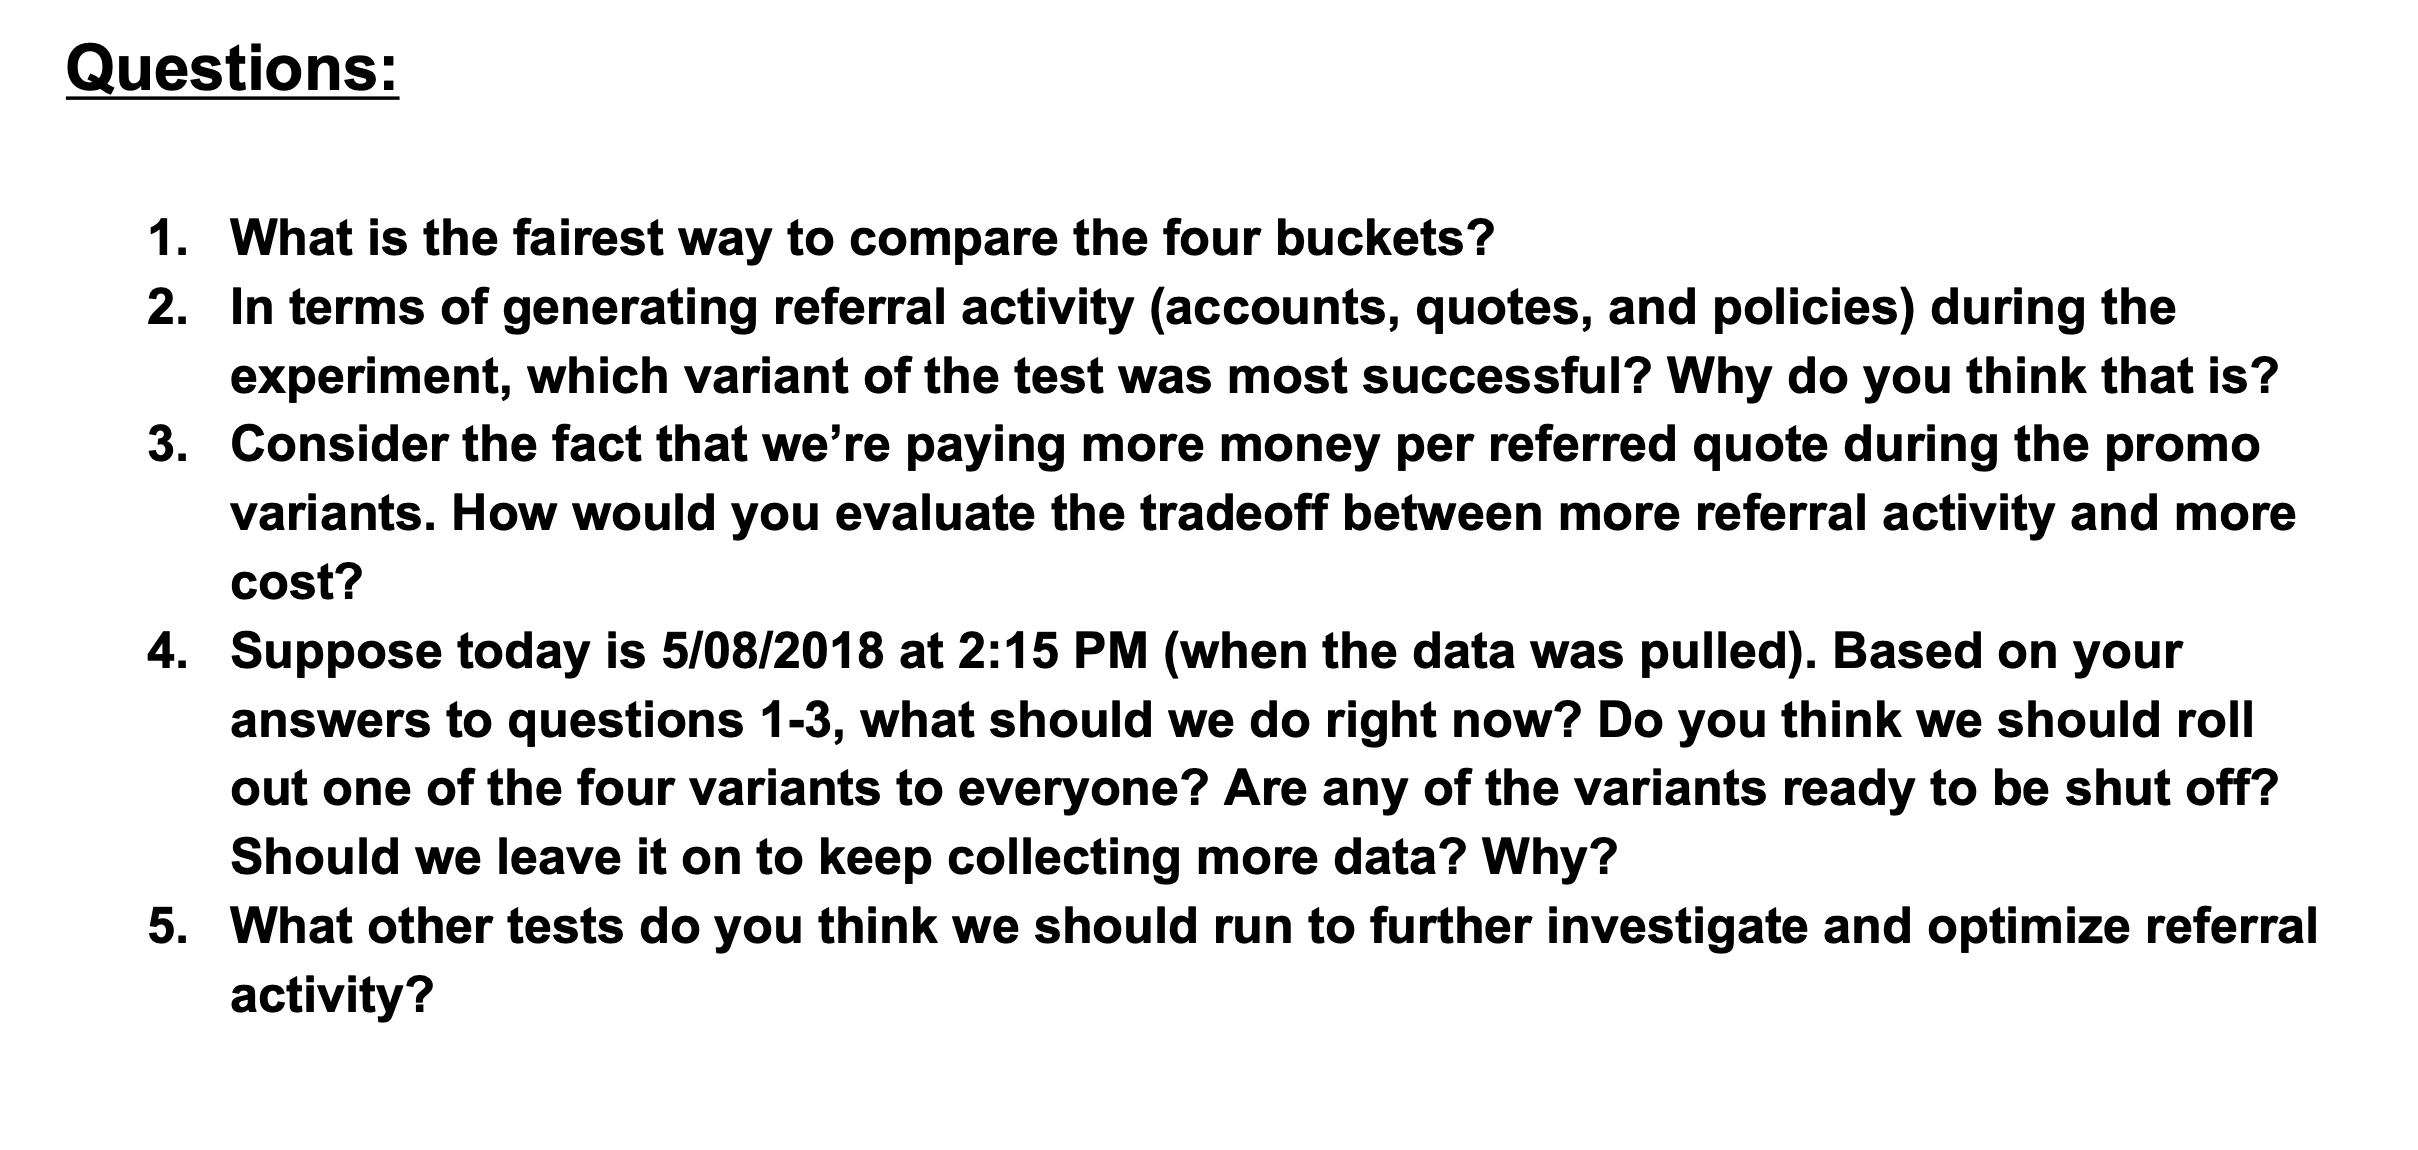

#### Summary:
    
    1) There is a total of 3,584 participants in the test group. 
    
    2) Out of 3,584 that recieved promo, 881 that started immediately, 851 started after 7 days, 917 started after 2 days, and 935 did not recieve any promotion. 
    
    3) Only 420 (~35%) people recieved an quote out of 1202 who had been referred and had taken part in the program. 
    
    4) Root only pays referral bonous to this population. 
    
    5) Out of the 420, 400 of the referral bonus for sender & reciever were same amount. 20 of the referral bonous were not similar maybe because of state limits/fraud which can be seen in diff_amt_v1 table. 
    
    6) 181 out of 400 who recieved the 50 dollars promotional offer, 99 had promo started immediately, 48 after 2 days, and 34 after 7 days. 
    
    7) 219 out of 400, who recieved the 25 dollars promotional offer, 28 had promo started immediately, 45 after 2 days, 62 after 7 days, and 84 had no promotional offer. Since this implies that those that do not have a promotional offer, 84 of them were actually referred by the sender who did not have any promotional offer. Out of the ones that had promotional offer, 136 the offer period probably had expired when they sent the referral.

1) The fairest way to compare four buckets would be to see how many people in each bucket actually utilize the promotional offer and referred to someone they know. To evaluate the referall program itself, once referred, we can check how likely was the referred customer converted to Root

2) Regarding the referral activity, the one that had promotion start immediately seemed to have more referral hence was more 'sucessful'. However, looking closely, we can also see that 136 people who had promotional offer peroid did not use it on the specified time limit. Hence, the question of actually if the promotional offer is working as expected needs to be more carefully evaluated.

3) The tradeoff could be evaluated by looking at how profitable the program is and how good the conversion rate is. If a large majority recieves the quote,however, does not subscribe to the insurance premium, then some changes to the program is required. If more referred activitiy leads to the subscription and more customer to Root then it is worth investing on the program. 

4) Based on the given data, I do not recommend rolling out any of the four variants. So far, it seems that only 181 out of 400 were due to the promotional marketing offer of 50 dollars. Out of those 181, 126 had senders and recievers recieveing the same amount. Out of the 126, only 55 were actually from recieving the 50 dollars promotional offer that were converted as Root Customer/bought the policy. Since 55 subscribed from 50 dollars promotional offer, I think more testing should be done to a larger population to see if there is acutally any substantial effect or some addition marketing must be introduced for customers to be aware that such 50 dollar promotion exists or provide a larger time window. Moreover, the variants of 7 days after promotion do not seem to be that substantial so could be shut off.

5) For further investigation, the root cause of why customers are not responding to the 50 dollars marketing offer should be addressed. Is it becuase 30-window is inconvenient? Or is it because the reciever didnt realize that they had 50 dollar marketing offer in the first place and should be constatntly remided for them to utilize such offer? Once these issues are better known, such referral could be optmized,